In [2]:
%matplotlib inline

## Load the Data

scikit-learnには、最初から手書きの数字を認識するための学習データ(手書き数字の画像データと、その画像の数字が0～9の何れであるかという答えのセット)が搭載されているため、それを利用します。

In [3]:
def load_data():
    from sklearn import datasets
    dataset = datasets.load_digits()
    return dataset

digits = load_data()
print(digits.data.shape)

(1797L, 64L)


In [4]:
print(digits.target.shape)

(1797L,)


In [17]:
import numpy as np
data2=np.loadtxt('D:/number_recognizer/test.txt')
target2=np.loadtxt('D:/number_recognizer/target.txt')

In [18]:
print(data2.shape)
print(target2.shape)

(1153L, 64L)
(1153L,)


`1797`は行数、`64`は次元数です。手書き文字の画像データが8×8のサイズであるため、その中のピクセル情報は64となります(今回値はグレースケールですが、RGBの場合3倍になります)。

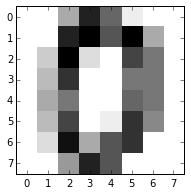

In [7]:
def show_image(image):
    import matplotlib.pyplot as plt

    plt.figure(1, figsize=(3, 3))
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

show_image(digits.images[0])

## Create the Model

今回扱うのは画像の分類問題になります。そこで、シンプルな線形分類機であるSGDClassifierを利用します。

In [8]:
def make_model():
    from sklearn.linear_model import SGDClassifier    
    clf = SGDClassifier(alpha=0.0001, fit_intercept=True, n_iter=200)
    return clf
    
classifier = make_model()

## Training the Model

データとモデルがそろったため、学習させてみます。

In [9]:
classifier.fit(digits.data, digits.target)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=200, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

## Evaluate the Model

学習させたモデルの精度を計測してみます。`predict`で予測させることができるので、これで予測させた値と実際の答え(`digits.target`)を比べてみます。

In [10]:
def calculate_accuracy(model, dataset):
    from sklearn import metrics

    predicted = model.predict(dataset.data)
    score = metrics.accuracy_score(dataset.target, predicted)
    return score

print(calculate_accuracy(classifier, digits))

0.988870339455


## Store the Model

最後に、学習させたモデルを保存します。アプリケーション側で、その結果を確認してみてください。

In [11]:
from sklearn.externals import joblib

joblib.dump(classifier, "./machine.pkl") 

['./machine.pkl',
 './machine.pkl_01.npy',
 './machine.pkl_02.npy',
 './machine.pkl_03.npy',
 './machine.pkl_04.npy']

[  0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.          14.          15.96871942
  15.09966887   0.           0.           0.           0.           0.           0.
   0.           0.          15.96871942   0.           0.           0.           0.
  15.96871942   0.           0.          15.96871942   0.           0.           0.
   0.          15.96871942   0.          15.96871942   0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.        ]
Classification report for classifier SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=200,

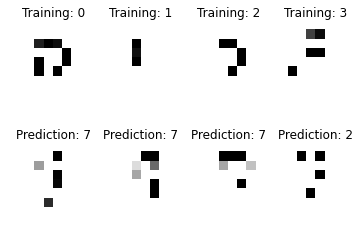

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

from sklearn import datasets, svm, metrics


#digits = datasets.load_digits()

print (data2[0])

images_and_labels = list(zip(data2, target2))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    image = np.reshape(image,(8,8))
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
   

#n_samples = len(digits.images)

target2 = target2.astype(int)
#data = digits.images.reshape((n_samples, -1))
data = data2
#data = data2[:,np.nonzero(rfe.ranking_ < 10)[0]]
n_samples = len(target2)


classifier = SGDClassifier(alpha=0.0001, fit_intercept=True, n_iter=200)
#classifier = svm.SVC(gamma=0.0001)


#classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])
classifier.fit(data[:n_samples / 2], target2[:n_samples / 2])


#expected = digits.target[n_samples / 2:]
expected = target2[n_samples / 2:]
predicted = classifier.predict(data[n_samples / 2:])

print("Classification report for classifier %s:\n%s\n"
    % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s"
    % metrics.confusion_matrix(expected, predicted))


images_and_predictions = list(zip(data2[n_samples / 2:], predicted))


for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    image = np.reshape(image,(8,8))
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()




In [13]:
data.shape

(1153L, 64L)

In [14]:
from sklearn.externals import joblib

joblib.dump(classifier, "./machine2.pkl") 

['./machine2.pkl',
 './machine2.pkl_01.npy',
 './machine2.pkl_02.npy',
 './machine2.pkl_03.npy',
 './machine2.pkl_04.npy',
 './machine2.pkl_05.npy',
 './machine2.pkl_06.npy',
 './machine2.pkl_07.npy',
 './machine2.pkl_08.npy',
 './machine2.pkl_09.npy',
 './machine2.pkl_10.npy',
 './machine2.pkl_11.npy']

In [179]:
print(n_samples)
print(digits.target)
len(target2)

864
[0 1 2 ..., 8 9 8]


864

D:\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


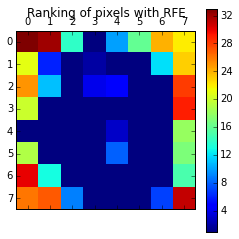

In [15]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset

X = data2[:n_samples / 2]
y = target2[:n_samples / 2]


# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)


# Plot pixel ranking
plt.matshow(ranking)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()



In [206]:
np.nonzero(rfe.ranking_ < 15)[0] 

array([ 3,  4,  5,  9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 25, 26,
       27, 28, 29, 30, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47,
       50, 51, 52, 53, 54, 55, 58, 59, 60, 61, 62], dtype=int64)

In [207]:
X[:,np.nonzero(rfe.ranking_ < 15)[0]].shape

(432L, 45L)

In [208]:
rfe.ranking_ 

array([33, 32, 16,  1, 14, 13, 21, 18, 19,  1,  1,  1,  1,  1, 10, 20, 23,
        7,  1,  1,  1,  1,  1, 27, 25,  3,  1,  2,  1,  1,  6, 29, 17,  1,
        1,  1,  1,  1,  5, 15, 22,  1,  1,  1,  1,  1,  1, 12, 24, 26,  1,
        1,  1,  1,  1, 11, 28, 30,  9,  1,  1,  8,  4, 31])

<function reshape at 0x0000000003F31D68>


In [16]:
expected = target2[n_samples / 2:]
predicted = rfe.predict(data2[n_samples / 2:])


print("Classification report for classifier %s:\n%s\n"
   % (rfe, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s"
    % metrics.confusion_matrix(expected, predicted))



Classification report for classifier RFE(estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
  estimator_params=None, n_features_to_select=None, step=1, verbose=0):
             precision    recall  f1-score   support

          0       0.34      0.32      0.33        65
          1       0.39      0.85      0.54        39
          2       0.42      0.46      0.44        70
          3       0.26      0.33      0.29        58
          4       0.36      0.36      0.36        61
          5       0.23      0.15      0.18        60
          6       0.37      0.30      0.33        63
          7       0.43      0.45      0.44        51
          8       0.38      0.21      0.27        62
          9       0.30      0.27      0.28        48

avg / total       0.35      0.35      0.34       577


Confusion matrix:
[[21  5  6  6  2  3  9  4  6

Optimal number of features : 21


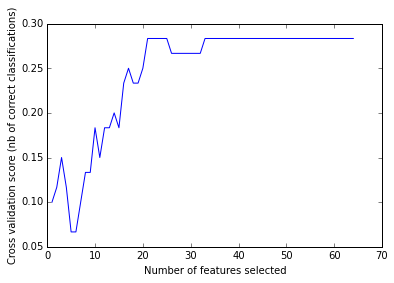

In [246]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X = data2
y = target2

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y, 2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()



In [22]:
expected = target2[n_samples / 2:]
predicted = rfecv.predict(data2[n_samples / 2:])


print("Classification report for classifier %s:\n%s\n"
    % (rfecv, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s"
    % metrics.confusion_matrix(expected, predicted))

NameError: name 'rfecv' is not defined

In [174]:
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline

# import some data to play with
X, y = samples_generator.make_classification(
    n_features=20, n_informative=3, n_redundant=0, n_classes=4,
    n_clusters_per_class=2)

# ANOVA SVM-C
# 1) anova filter, take 3 best ranked features
anova_filter = SelectKBest(f_regression, k=3)
# 2) svm
clf = svm.SVC(kernel='linear')

anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X, y)
anova_svm.predict(X)

array([2, 1, 3, 2, 1, 1, 1, 3, 0, 0, 2, 3, 0, 3, 2, 3, 3, 2, 1, 2, 0, 0, 1,
       3, 3, 1, 0, 1, 2, 0, 3, 2, 1, 2, 2, 1, 0, 1, 1, 3, 1, 0, 0, 0, 1, 1,
       3, 2, 3, 3, 0, 2, 3, 2, 2, 0, 1, 2, 2, 1, 3, 3, 0, 0, 1, 3, 2, 0, 3,
       1, 0, 3, 3, 0, 0, 2, 3, 2, 2, 1, 2, 0, 3, 1, 2, 0, 2, 2, 1, 0, 1, 1,
       2, 0, 3, 2, 1, 3, 0, 2])